In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import dataset, distance, error, find, historical, split
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

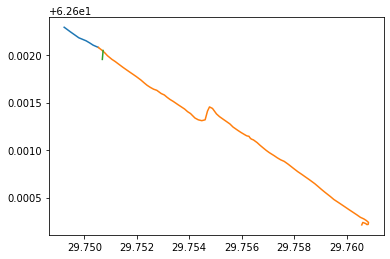

600.6931269940324
10.586307341529492


In [2]:
target_trajectory, data = dataset.load_users_trajectories_with_target(898, 1376323154598)
head, tail = split.split_trajectory_with_overlap(target_trajectory, 0.5)

head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

prediction = historical.predict_by_picking_random_tail(data, head, 3)
pred_x, pred_y = prediction[:, 0], prediction[:, 1]

head_x, head_y = head_x[-10:], head_y[-10:]
plt.plot(head_y, head_x)
plt.plot(tail_y, tail_x)
plt.plot(pred_y, pred_x)
plt.show()

print(distance.calculate_trajectory_length_in_meters(tail))
print(distance.calculate_trajectory_length_in_meters(prediction))

In [3]:
THRESHOLD = 10
findings = find.find_point_overlapping_trajectories(data, head[-1], THRESHOLD)

print(len(findings))

4


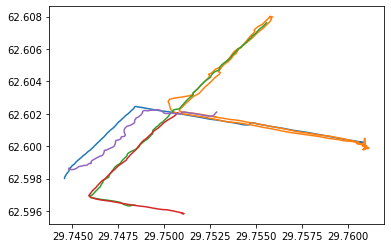

In [4]:
target_x, target_y = target_trajectory[:, 0], target_trajectory[:, 1]
plt.plot(target_y, target_x)

for f in findings:
    x, y = f[:, 0], f[:, 1]
    plt.plot(y, x)
plt.show()

In [5]:
SECONDS = 3
USER_ID = 898
trajectory_ids = dataset.get_list_of_users_trajectory_ids(USER_ID)

errors = []
failed = 0

for trajectory_id in trajectory_ids:
    print(trajectory_id, end='')
    target_trajectory, data = dataset.load_users_trajectories_with_target(USER_ID, trajectory_id)
    head, tail = split.split_trajectory_with_overlap(target_trajectory, 0.75)
    prediction = historical.predict_by_picking_random_tail(data, head, SECONDS)
    if len(prediction) > 0 and np.size(prediction, 0) > 0 and np.size(prediction, 1) == 4:
        error_amount = error.calculate_error_vector(tail, prediction)[:, 4]
        errors.append(error_amount)
        print(' success', len(error_amount), sum(error_amount))
    else:
        failed += 1
        print(' failed')

errors_sum = list(map(sum, errors))

print(
    'ERROR STATISTICS',
    '\naverage\t\t\t', np.average(errors_sum),
    '\nmedian\t\t\t', np.median(errors_sum),
    '\nstandard deviation\t', np.std(errors_sum),
    '\nfailed predictionsn\t', failed
)

1399399033400 success 2 16.12086675901166
1412515702026 success 2 7.072276915840835
1413382616849 failed
1379951571859 success 2 11.342522491759135
1379694392068 success 3 58.493086334667495
1407168712392 success 3 53.388770312970905
1400436362445 success 2 48.97178333523004
1407593205810 success 2 37.31195035633066
1396953544784 success 2 27.615701253337786
1408208026280 success 2 55.39770909883947
1404054152819 success 2 28.29154843834672
1401891357857 success 2 12.664620053444485
1394042416405 success 2 29.137350463425804
1380211927794 success 2 21.860178445106122
1377681725292 success 2 21.075047685713265
1397840479593 failed
1398930716368 success 2 17.378557894034262
1396260541459 success 2 3.4005945083170337
1404467994679 success 3 52.82863152380219
1412416411095 success 2 13.783650556010333
1402152509191 success 2 6.959186977477509
1396248149245 success 2 42.51362312563493
1394124365881 success 2 12.6870428989605
1378233064717 success 3 8.79976521380661
1399030904904 success 2 1

ValueError: a must be 1-dimensional